In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt

In [2]:
data=pd.read_csv("times.csv")

In [3]:
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
data=data.drop("ID",axis=1)

In [5]:
data["Datetime"]=pd.to_datetime(data["Datetime"],infer_datetime_format=True)

In [6]:
indexdata=data.set_index(["Datetime"])

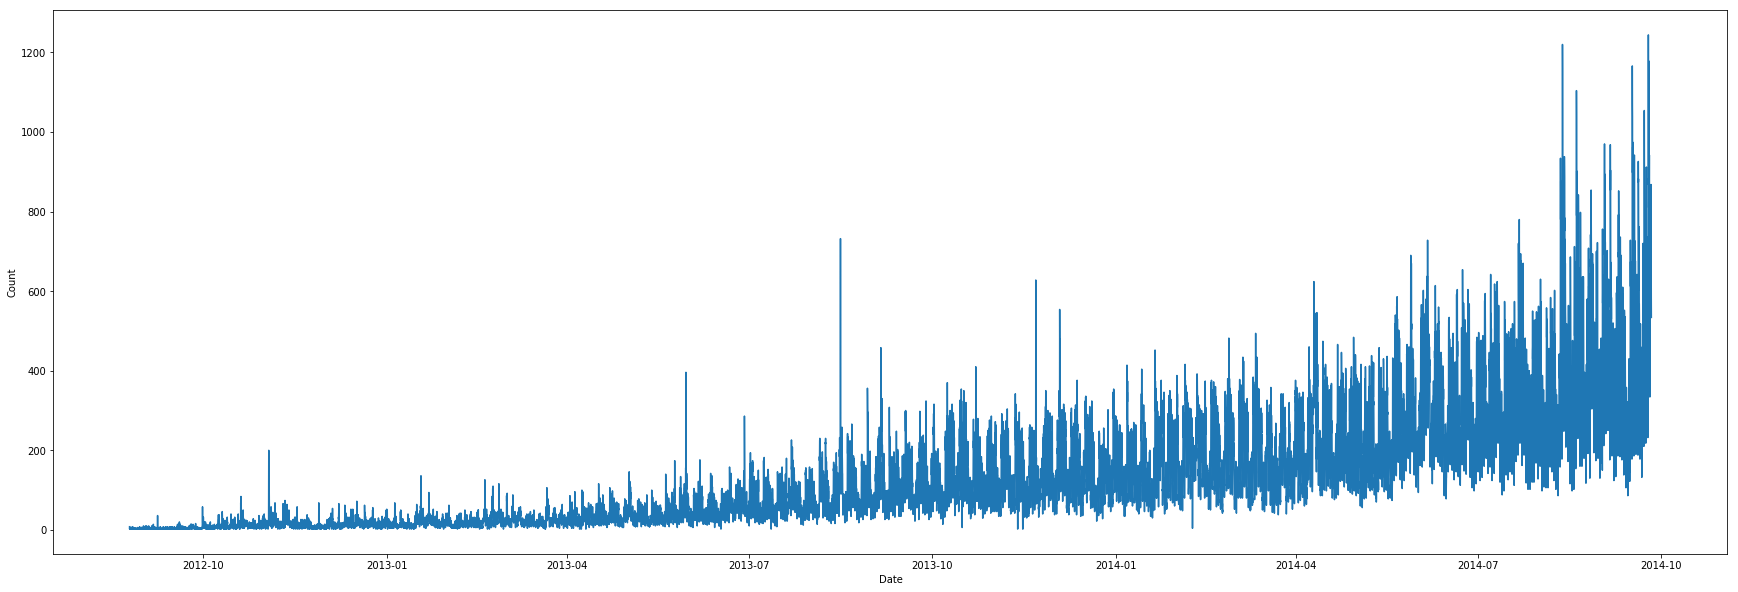

In [7]:
plt.figure(figsize=(30,10))
plt.xlabel("Date")
plt.ylabel("Count")
plt.plot(indexdata)

In [8]:
rolmean=indexdata.rolling(window=12).mean()
rolstd=indexdata.rolling(window=12).std()

In [9]:
rolstd.head()

,Count
Datetime,
2012-08-25 00:00:00,NaN
2012-08-25 01:00:00,NaN
2012-08-25 02:00:00,NaN
2012-08-25 03:00:00,NaN
2012-08-25 04:00:00,NaN


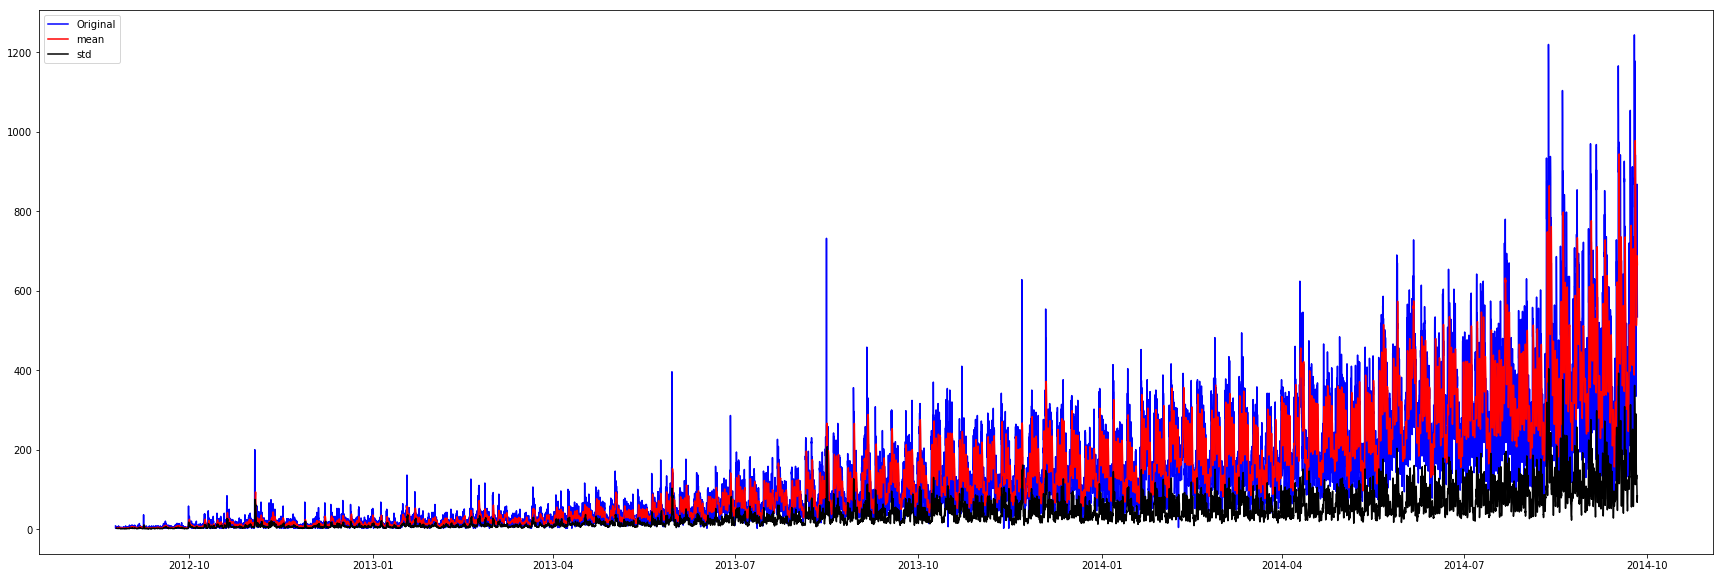

In [10]:
plt.figure(figsize=(30,10))
orign=plt.plot(indexdata,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='mean')
std=plt.plot(rolstd,color='black',label='std')
plt.legend(loc='best')
plt.show(block=False)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
print("Result of the dicky fuller test:")
dftest=adfuller(indexdata["Count"],autolag='AIC')
dfoutput=pd.Series(dftest[0],index=['Test Statistic','p-value','Lags used','number of observation'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
print(dfoutput)    

Result of the dicky fuller test:
Test Statistic          -4.456561
p-value                 -4.456561
Lags used               -4.456561
number of observation   -4.456561
Critical value (1%)     -3.430709
Critical value (5%)     -2.861698
Critical value (10%)    -2.566854
dtype: float64


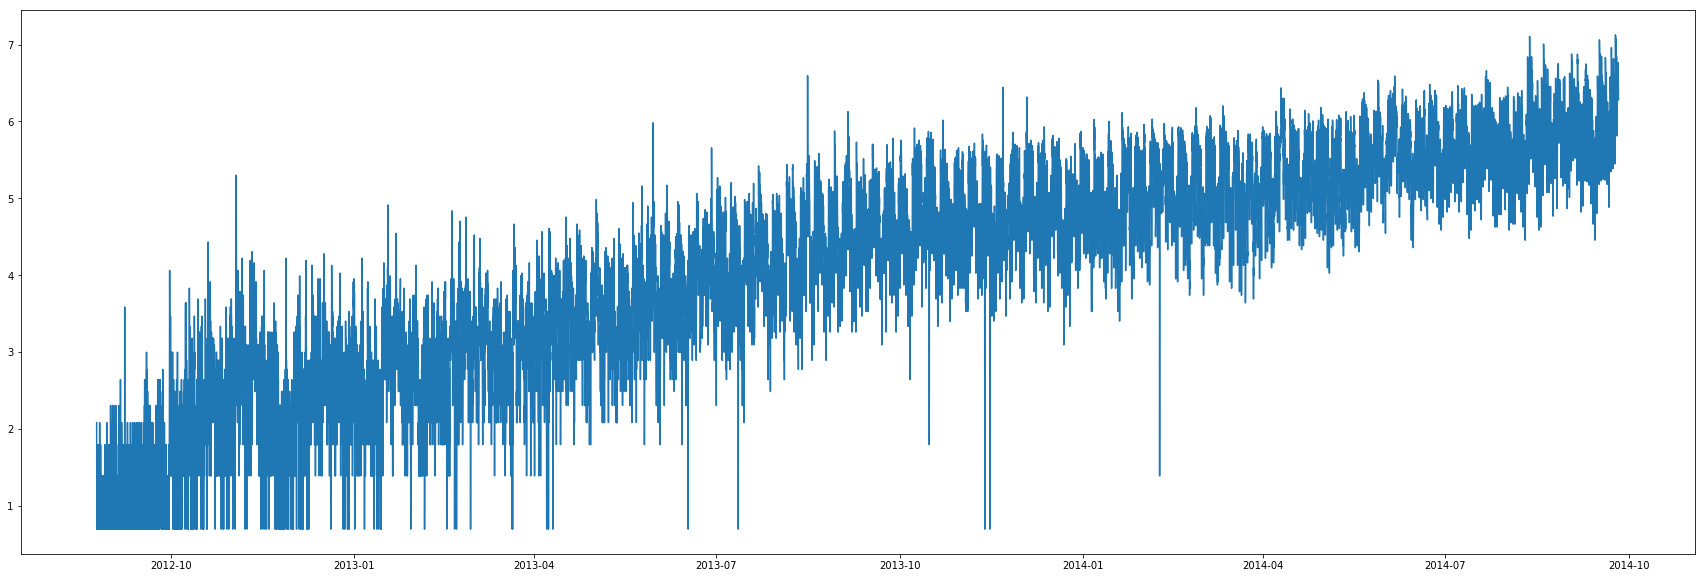

In [13]:
plt.figure(figsize=(30,10))
indexdata_logscale=np.log(indexdata)
plt.plot(indexdata_logscale)
#estimating trend

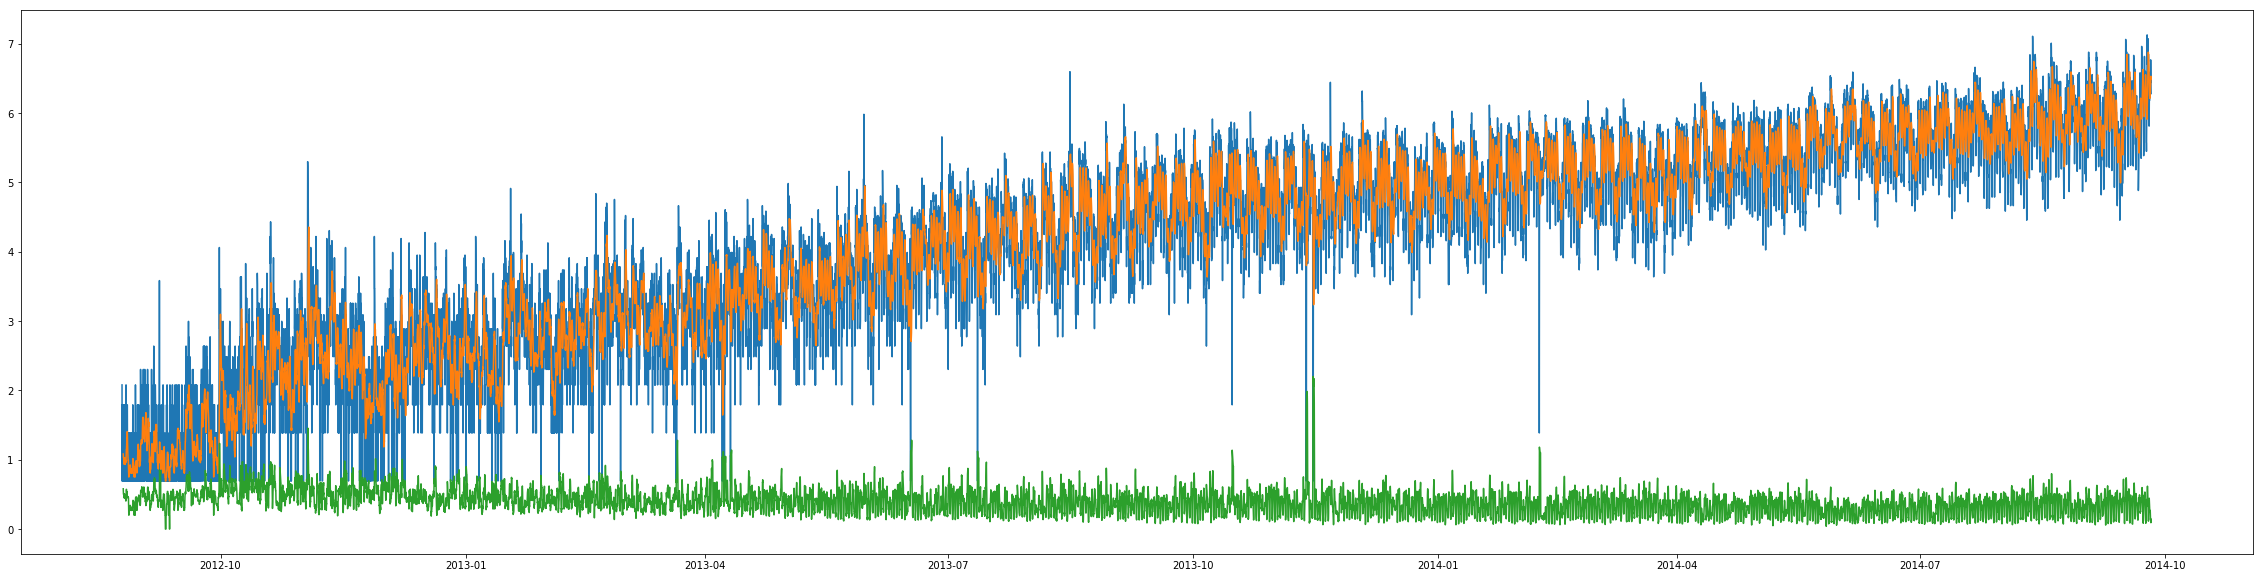

In [14]:
plt.figure(figsize=(40,10))
movingAverage=indexdata_logscale.rolling(window=12).mean()
movingStd=indexdata_logscale.rolling(window=12).std()
plt.plot(indexdata_logscale)
plt.plot(movingAverage)
plt.plot(movingStd)

In [15]:
datasets=indexdata_logscale-movingAverage

In [16]:
datasets.dropna(inplace=True)

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def test_stationary(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).mean()
    
    #plot
    plt.figure(figsize=(30,10))
    orig=plt.plot(timeseries,color='blue',label='Orignal')
    mean=plt.plot(movingAverage,color='red',label='mean')
    std=plt.plot(movingStd,color='green',label='std')
    plt.legend(loc='best')
    plt.title('rolling mean & standerd deviation')
    plt.show(block=False)
    
    #perform dick fuller test
    
    print("result of dicky fuller test:")
    dftest=adfuller(timeseries['Count'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=["test statistics","p-value","lag_used","number of observation"])
    for key,value in dftest[4].items():
        dfoutput['Critical values (%s)'%key]=value
    print(dfoutput)    
    

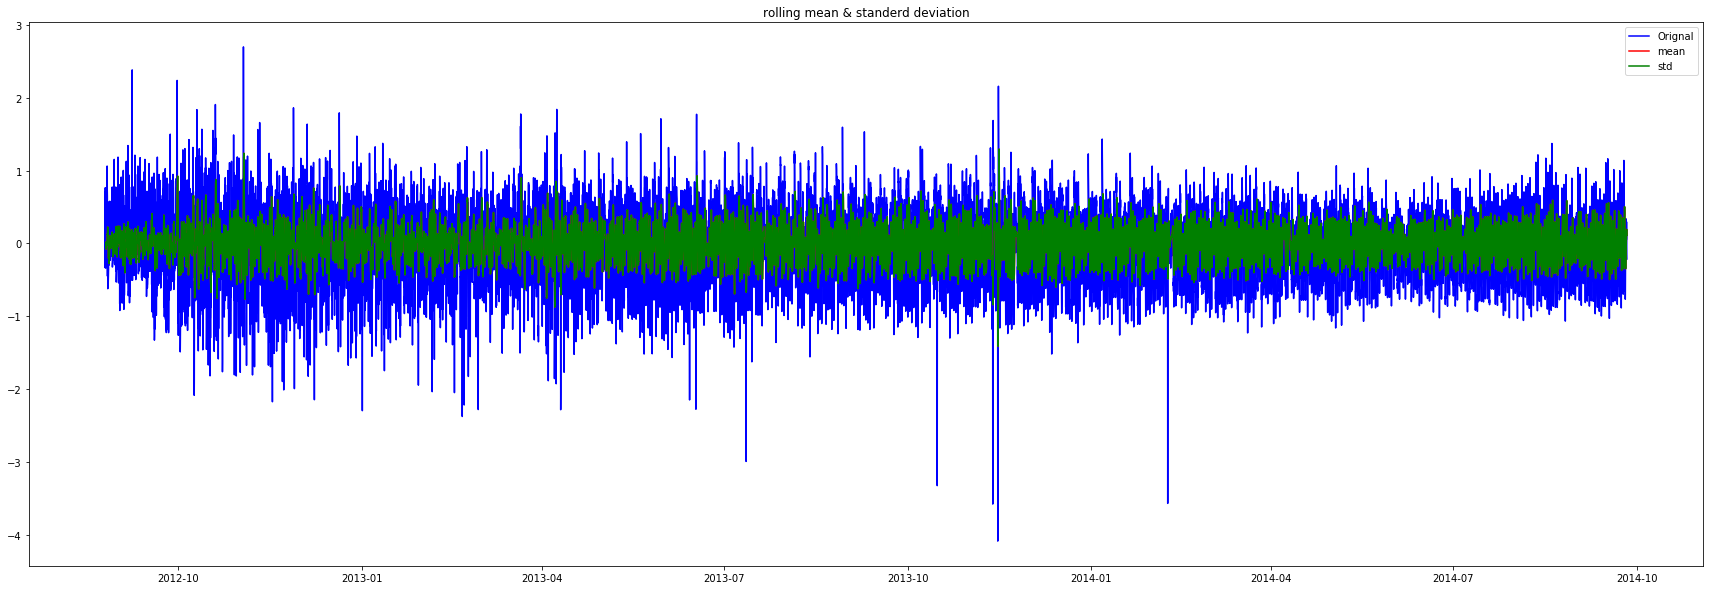

result of dicky fuller test:
test statistics            -24.228718
p-value                      0.000000
lag_used                    45.000000
number of observation    18231.000000
Critical values (1%)        -3.430709
Critical values (5%)        -2.861699
Critical values (10%)       -2.566854
dtype: float64


In [19]:
test_stationary(datasets)

In [20]:
exeweightavg=indexdata_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()

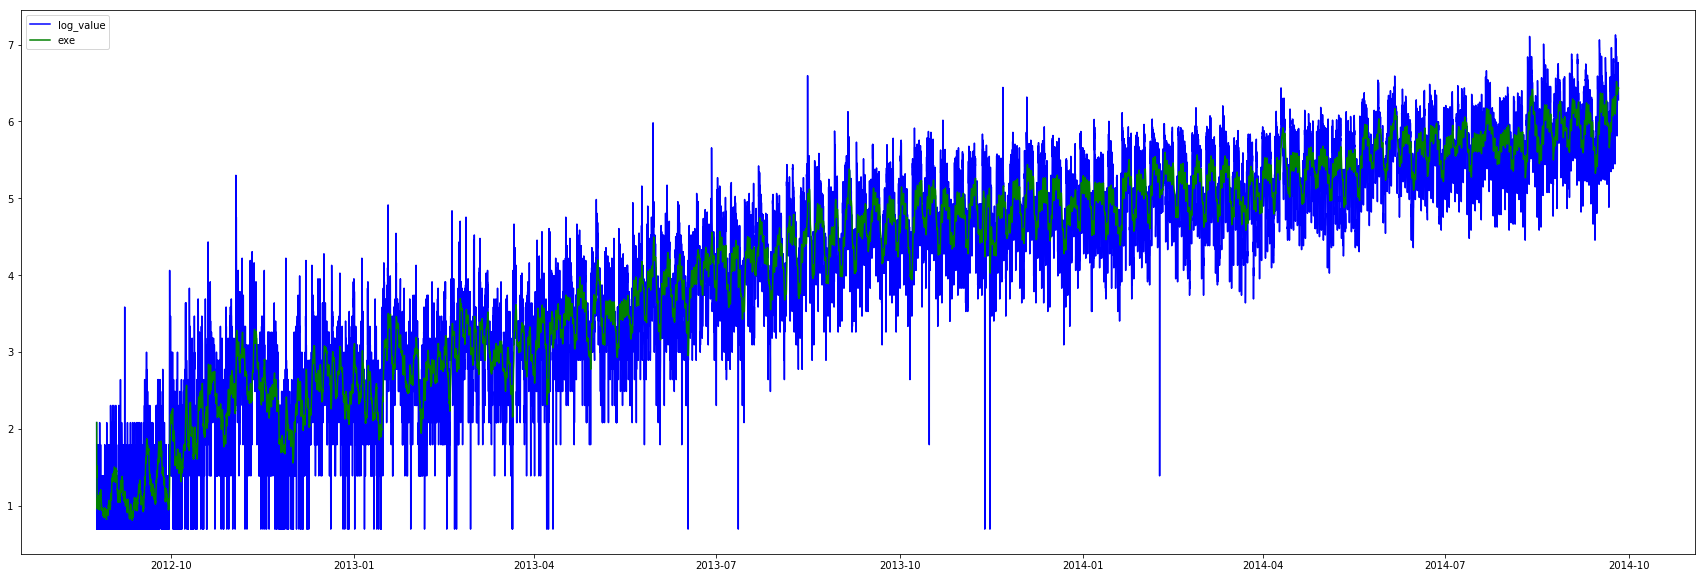

In [21]:
plt.figure(figsize=(30,10))
plt.plot(indexdata_logscale,color="blue",label="log_value")
plt.plot(exeweightavg,color="green",label="exe")
plt.legend(loc="best")

In [22]:
datasetss=indexdata_logscale-exeweightavg

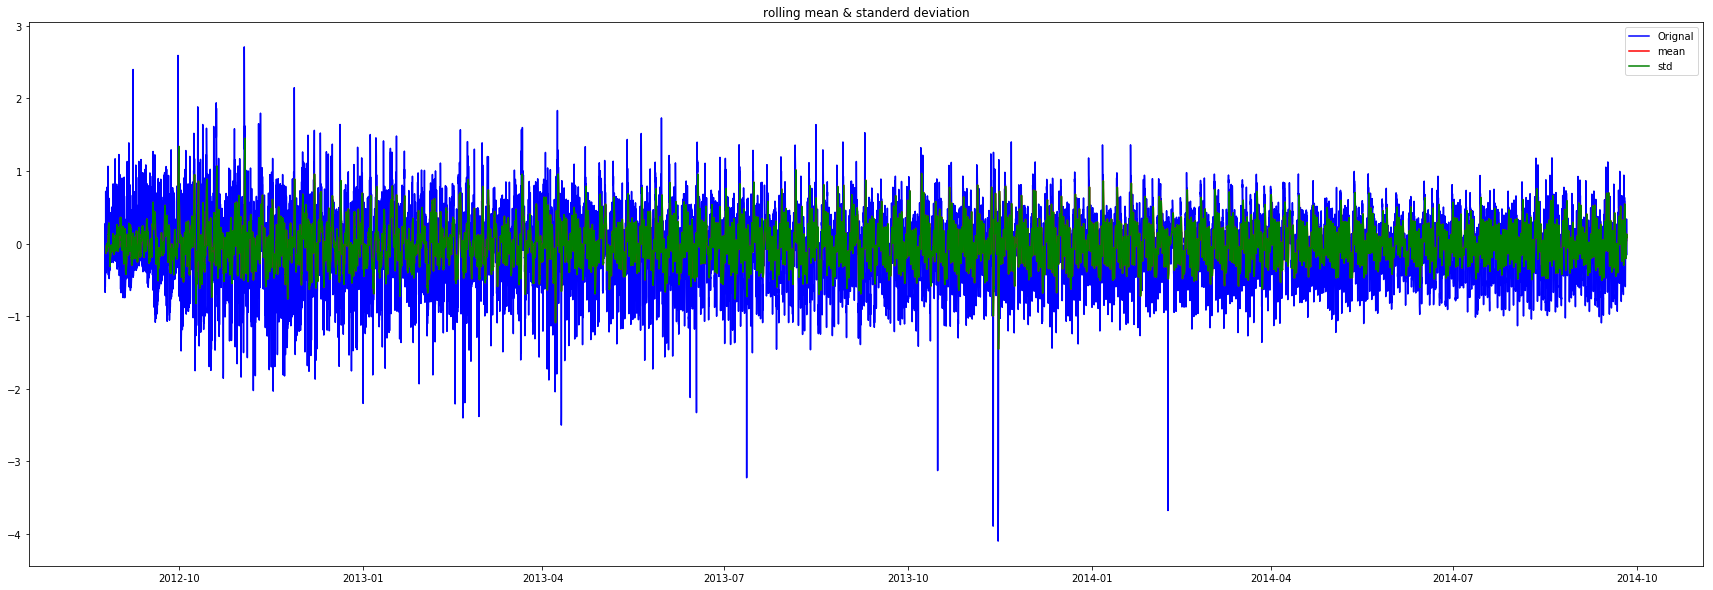

result of dicky fuller test:
test statistics            -21.006745
p-value                      0.000000
lag_used                    45.000000
number of observation    18242.000000
Critical values (1%)        -3.430709
Critical values (5%)        -2.861698
Critical values (10%)       -2.566854
dtype: float64


In [23]:
test_stationary(datasetss)

In [24]:
shiftdata=indexdata_logscale-indexdata_logscale.shift()

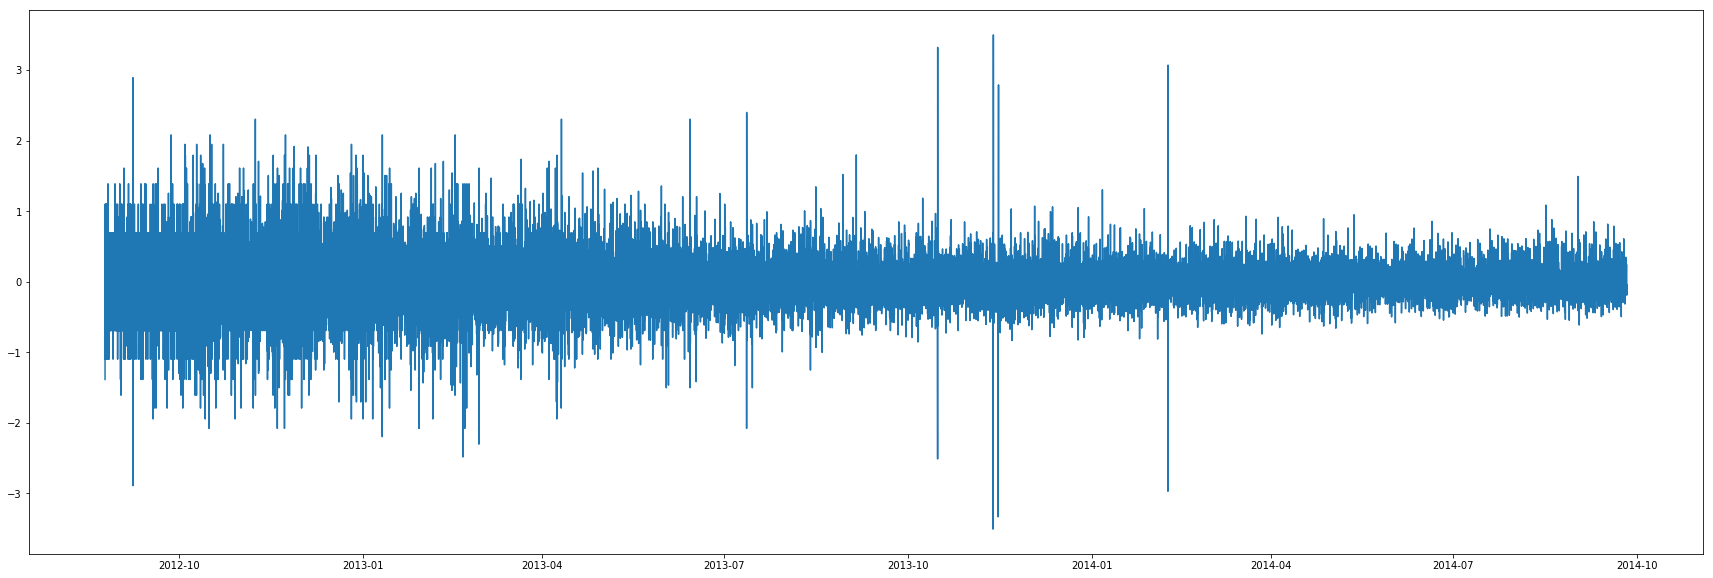

In [25]:
plt.figure(figsize=(30,10))
plt.plot(shiftdata)

<Figure size 2160x720 with 0 Axes>

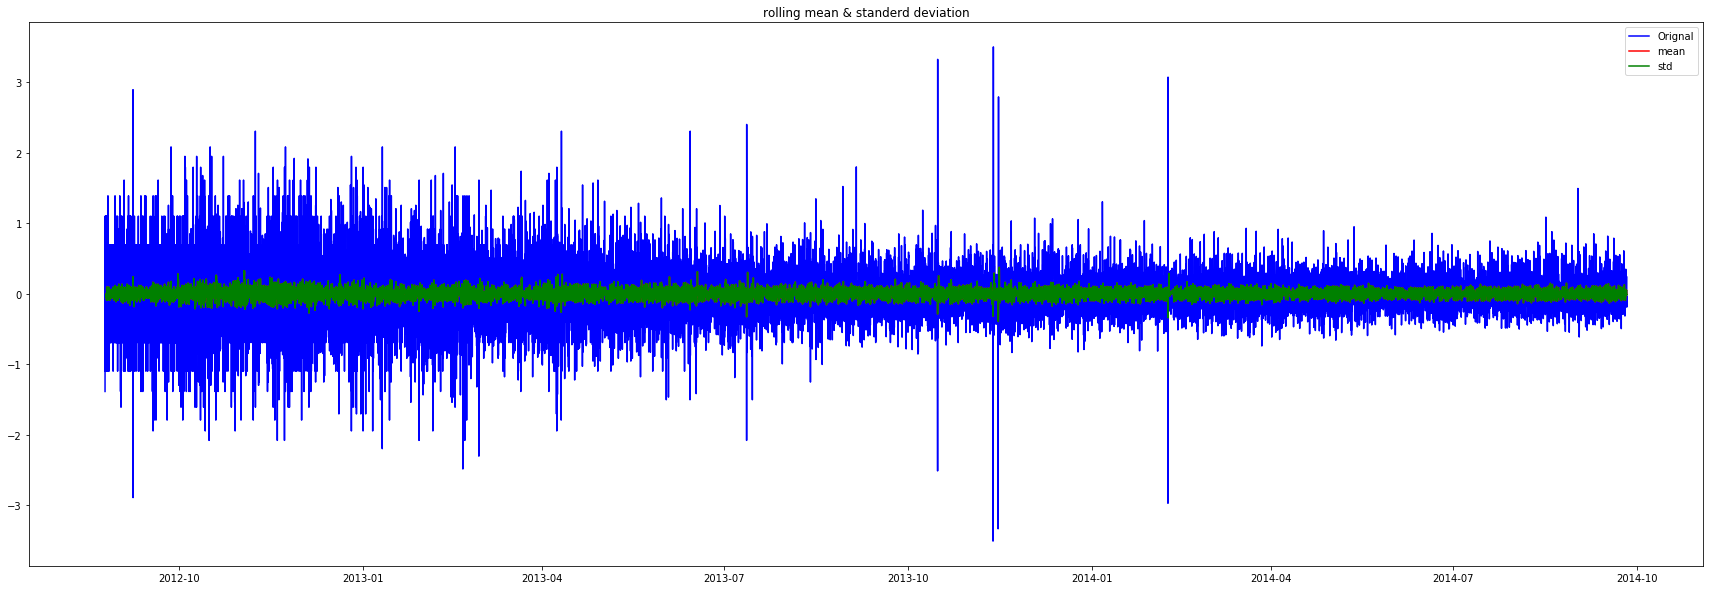

result of dicky fuller test:
test statistics            -32.041628
p-value                      0.000000
lag_used                    45.000000
number of observation    18241.000000
Critical values (1%)        -3.430709
Critical values (5%)        -2.861698
Critical values (10%)       -2.566854
dtype: float64


In [26]:
plt.figure(figsize=(30,10))
shiftdata.dropna(inplace=True)
test_stationary(shiftdata)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose


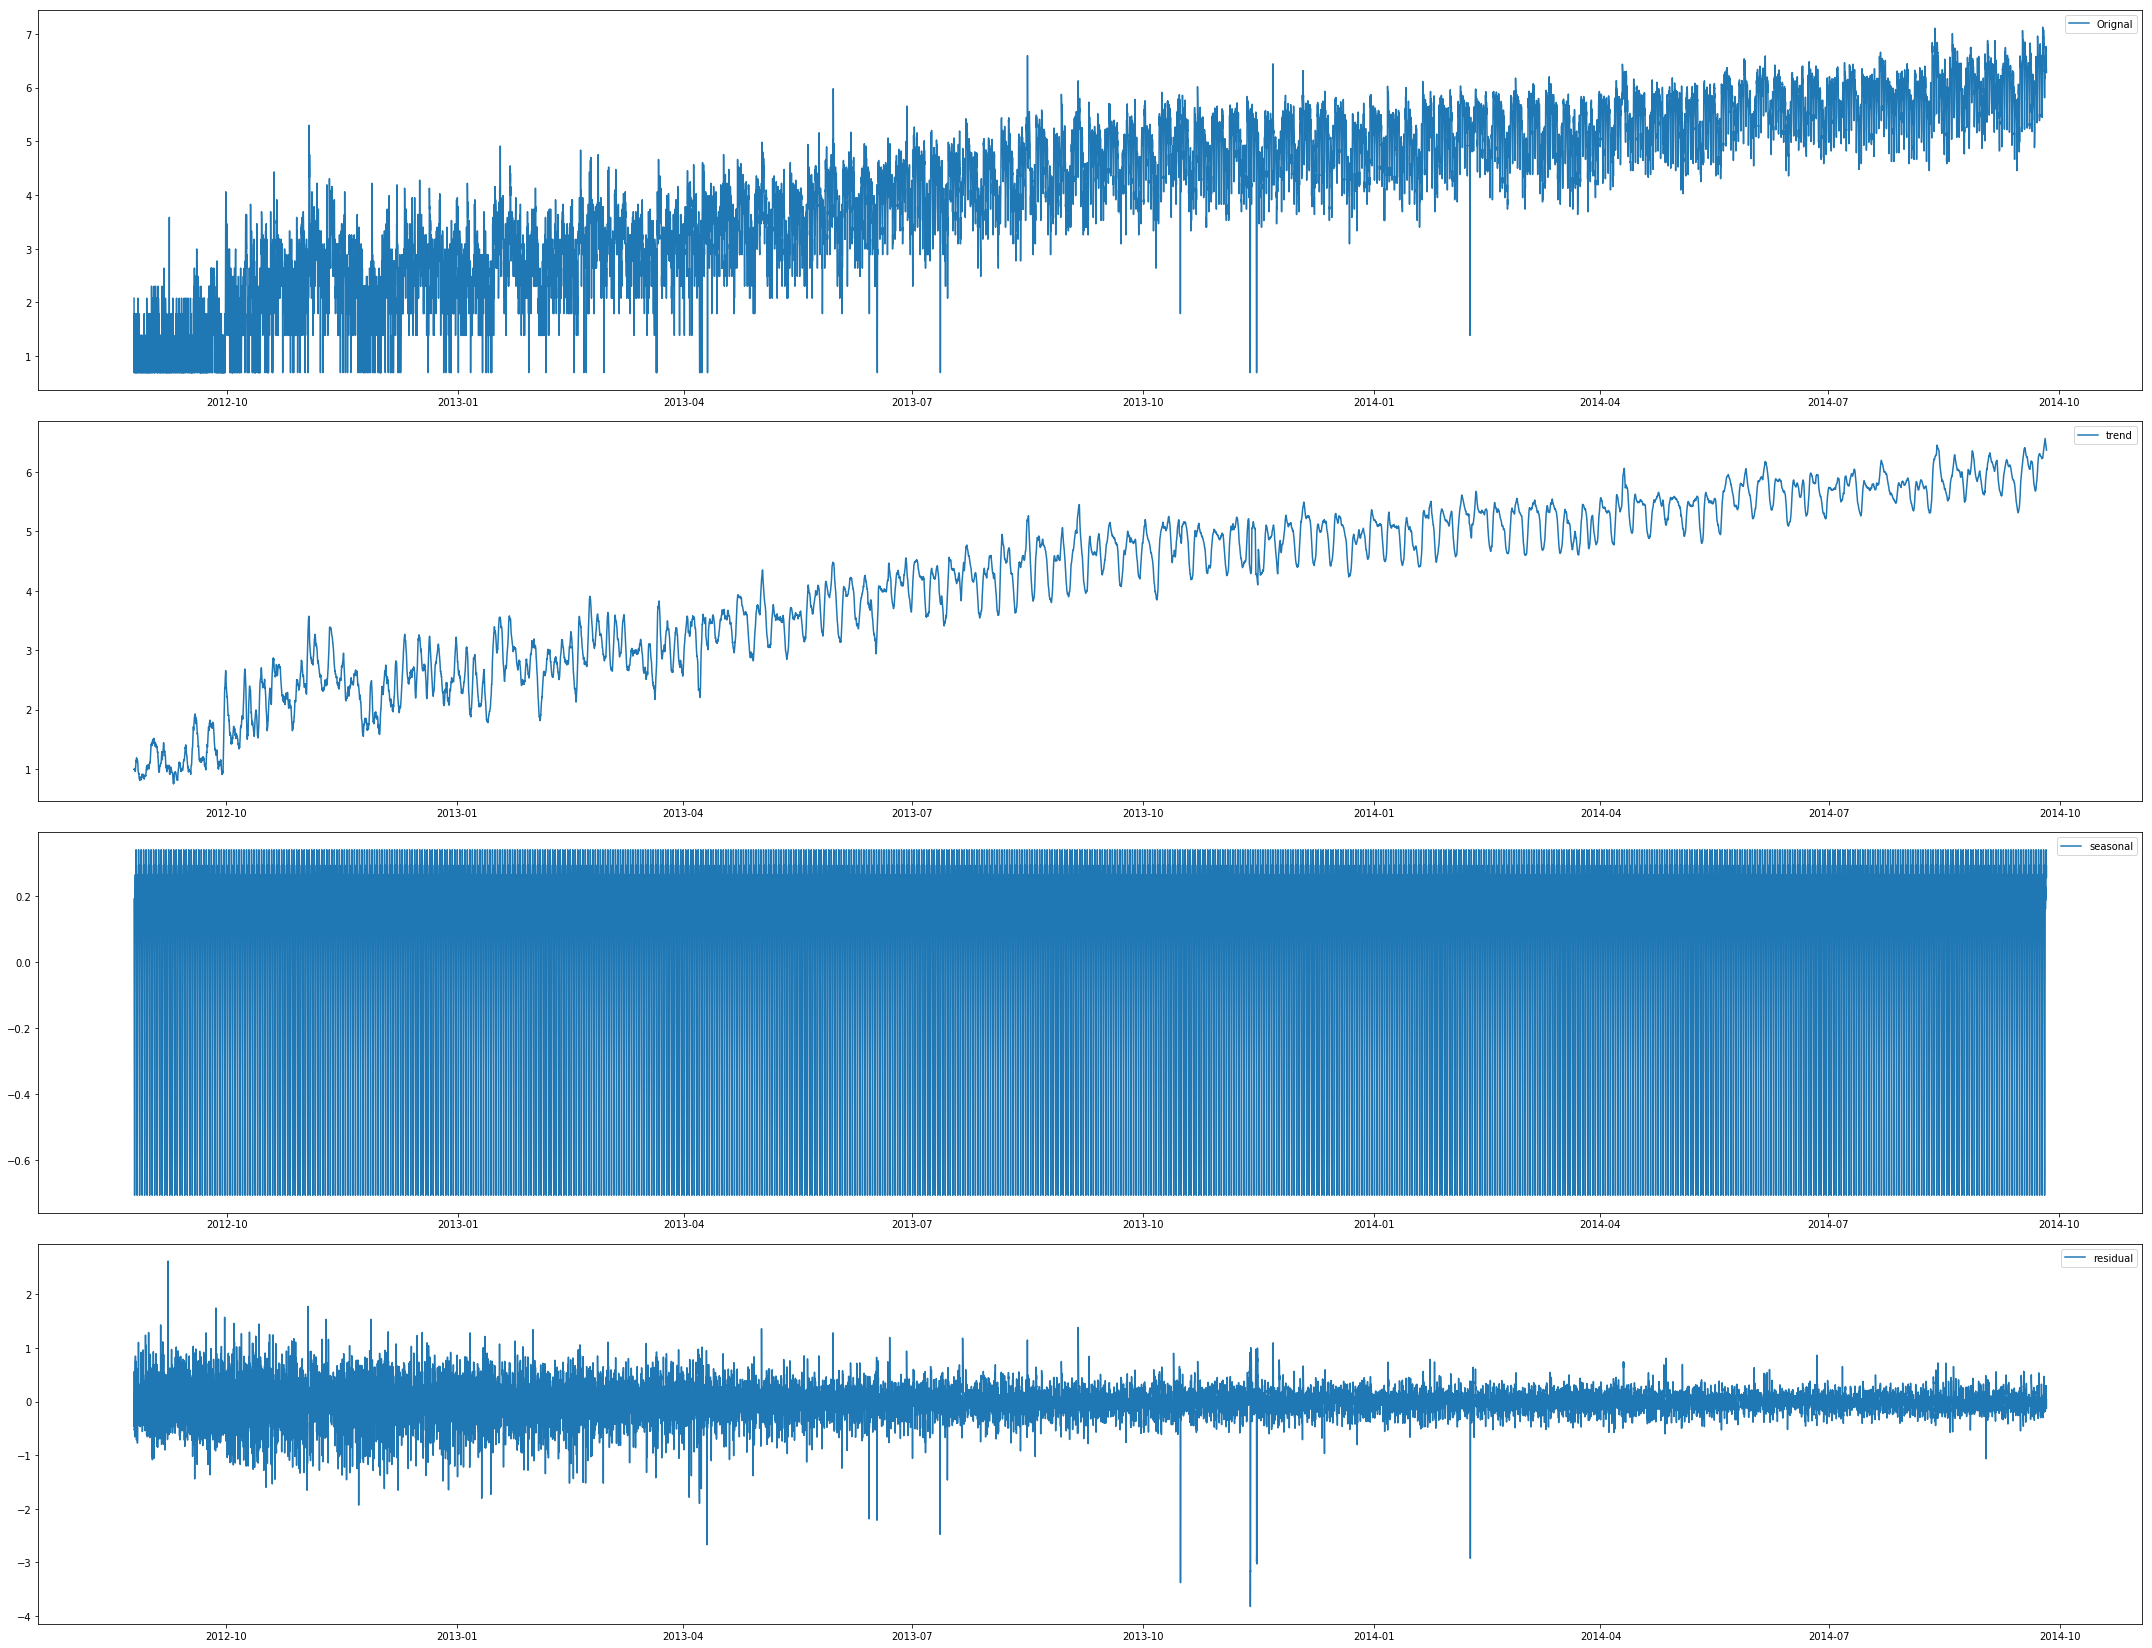

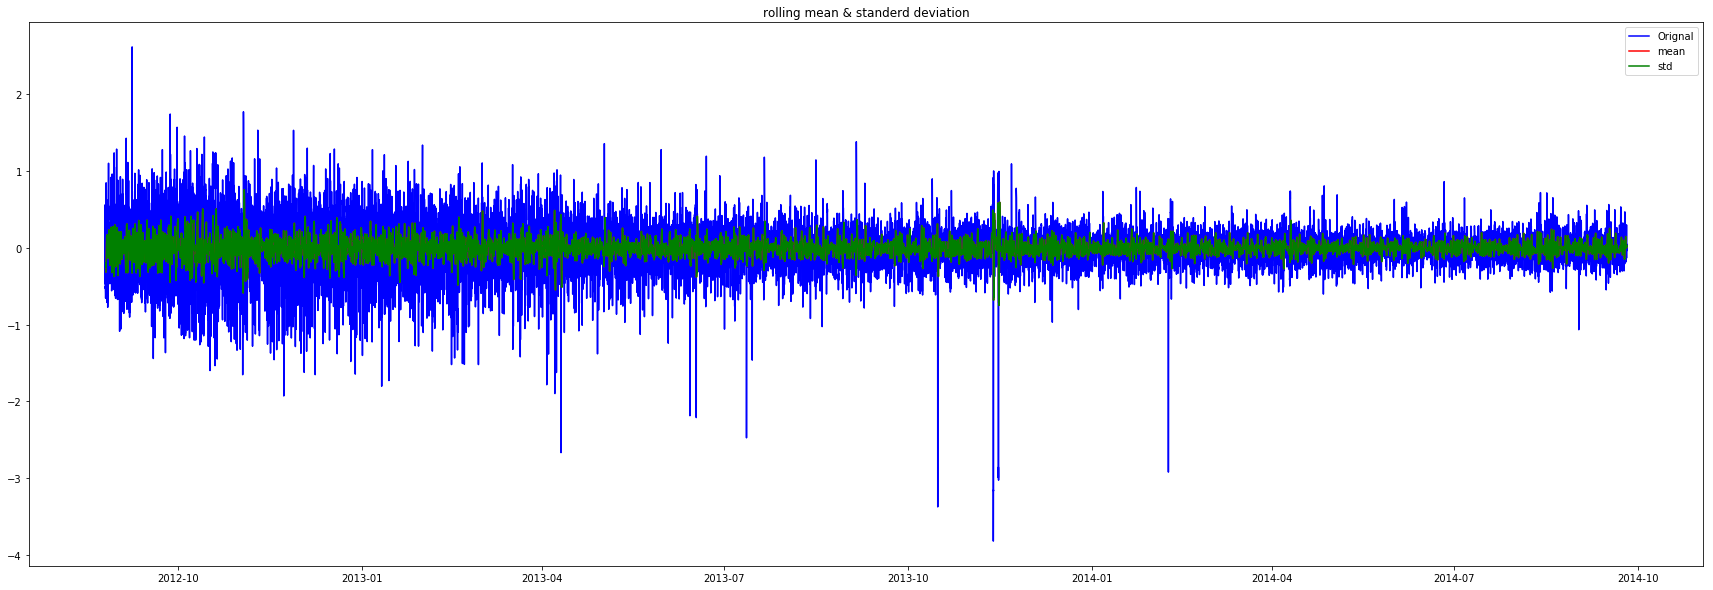

result of dicky fuller test:
test statistics            -32.205683
p-value                      0.000000
lag_used                    45.000000
number of observation    18218.000000
Critical values (1%)        -3.430709
Critical values (5%)        -2.861699
Critical values (10%)       -2.566854
dtype: float64


In [28]:
decomposition=seasonal_decompose(indexdata_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(30,23))
plt.subplot(411)
plt.plot(indexdata_logscale,label="Orignal")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="residual")
plt.legend(loc="best")
plt.tight_layout()


decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)


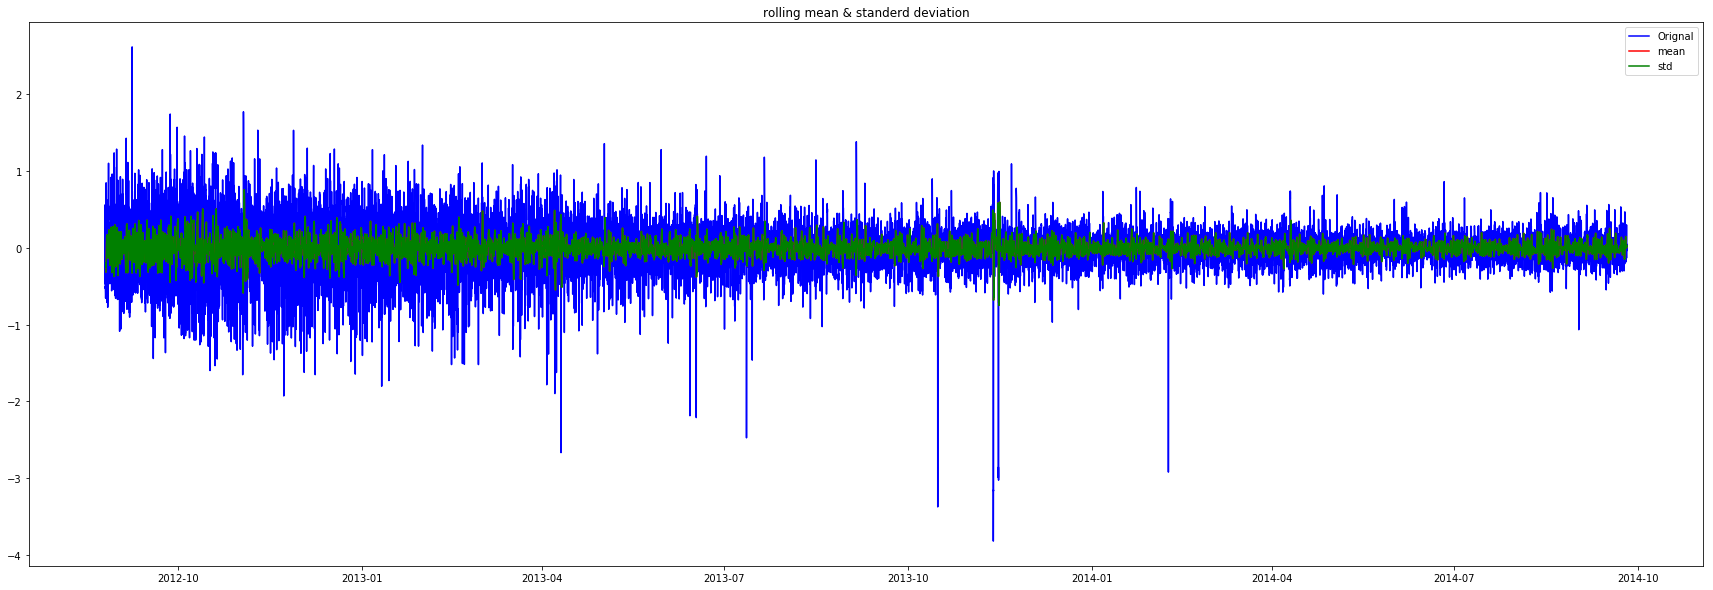

result of dicky fuller test:
test statistics            -32.205683
p-value                      0.000000
lag_used                    45.000000
number of observation    18218.000000
Critical values (1%)        -3.430709
Critical values (5%)        -2.861699
Critical values (10%)       -2.566854
dtype: float64


In [29]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)



In [32]:
from statsmodels.tsa.stattools import acf,pacf

In [35]:
lag_acf=acf(shiftdata,nlags=20)
lag_pacf=pacf(shiftdata,nlags=20,method='ols')

Text(0.5,1,'Partial Autocorrelation Function')

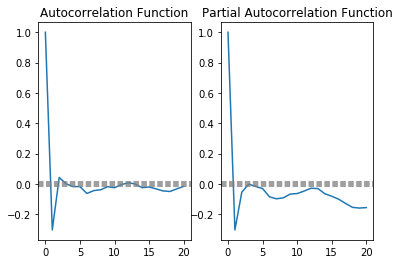

In [58]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shiftdata)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(shiftdata)),linestyle="--",color="gray")
plt.title("Autocorrelation Function")


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shiftdata)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(shiftdata)),linestyle='--',color="gray")
plt.title("Partial Autocorrelation Function")

In [59]:
from statsmodels.tsa.arima_model import ARIMA

/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


plotting AR model


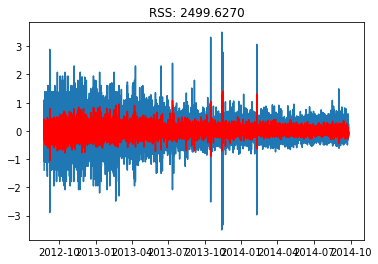

In [88]:
model=ARIMA(indexdata_logscale, order=(4,1,2))
                                       
result_AR=model.fit(disp=-1)
plt.plot(shiftdata)
plt.plot(result_AR.fittedvalues,color="red")
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-shiftdata["Count"])**2))
print("plotting AR model")

In [93]:
pridicted_arima=pd.Series(result_AR.fittedvalues, copy=True)

In [96]:
predicted_arima=pridicted_arima.cumsum()

In [100]:
prediction_arima_log=pd.Series(indexdata_logscale["Count"].iloc[0],index=indexdata_logscale.index)

In [101]:
prediction_arima_log=prediction_arima_log.add(predicted_arima,fill_value=0)
prediction_arima_log.head()

Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    2.079724
2012-08-25 02:00:00    2.499696
2012-08-25 03:00:00    2.223855
2012-08-25 04:00:00    2.504816
dtype: float64

In [102]:
prediction_arimaa=np.exp(prediction_arima_log)

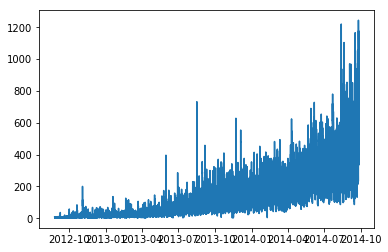

In [104]:
plt.plot(indexdata)

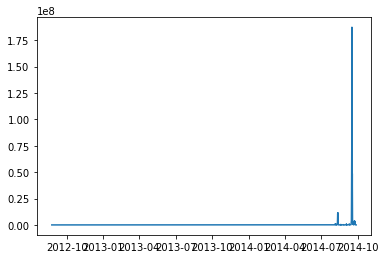

In [105]:
plt.plot(prediction_arimaa)

In [111]:
 indexdata_logscale.shape

(18288, 1)

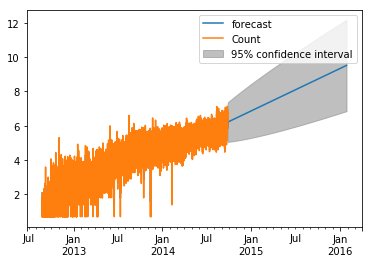

In [115]:
result_AR.plot_predict(1,30000)
x=result_AR.forecast(steps=240)